<a href="https://colab.research.google.com/github/duckmhd201/DataAnalystDeepLearning/blob/main/lab02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [108]:
import pandas as pd
dulieuxettuyen = pd.read_csv("/drive/My Drive/dulieuxettuyen.csv")
df = pd.DataFrame(dulieuxettuyen).fillna(0)
df.sort_values(by=['DH1'])



,Unnamed: 0,STT,T1,L1,H1,S1,V1,X1,D1,N1,T2,L2,H2,S2,V2,X2,D2,N2,T3,L3,H3,S3,V3,X3,D3,N3,T4,L4,H4,S4,V4,X4,D4,N4,T5,L5,H5,S5,V5,X5,D5,N5,T6,L6,H6,S6,V6,X6,D6,N6,GT,DT,KV,DH1,DH2,DH3,KT,TBM1,TBM2,TBM3,XL1,XL2,XL3,US_TBM1,US_TBM2,US_TBM3,ĐXT,KQST
53,53,54,4.9,5.9,6.2,5.6,5.9,5.0,7.0,5.6,6.1,7.1,6.4,6.0,6.3,5.5,6.2,6.6,2.5,4.8,5.0,5.0,4.5,2.4,5.8,3.7,6.2,4.1,4.4,5.2,4.1,6.3,4.9,4.6,4.9,5.2,4.9,5.5,5.5,4.6,5.5,5.4,6.5,7.5,6.1,5.6,5.2,5.7,5.6,6.3,M,0.0,1,1.00,5.50,4.25,A,5.69,6.26,6.02,TB,TB,TB,2.276,2.504,2.408,2.937500,rớt
43,43,44,6.6,7.2,5.9,6.9,7.6,8.1,7.3,6.7,6.3,6.9,6.0,6.4,7.0,7.1,6.9,6.2,6.7,7.1,5.4,6.8,6.8,5.9,6.6,6.8,6.0,7.6,6.5,7.6,6.7,7.1,7.9,5.6,5.8,5.9,5.8,4.6,6.6,4.0,6.0,6.2,6.0,7.6,6.5,7.6,6.7,7.1,7.9,5.6,F,1.0,2,1.25,3.50,5.00,D1,7.05,6.61,6.77,K,K,K,2.820,2.644,2.708,3.250000,rớt
72,72,73,5.5,6.6,7.2,7.6,5.5,6.7,6.7,5.2,6.0,6.8,6.3,7.2,4.9,4.8,6.6,5.3,4.6,5.5,5.5,7.1,5.2,6.1,7.1,5.4,5.2,4.7,5.8,6.3,5.7,5.6,5.2,5.3,5.2,5.5,6.3,6.6,6.1,6.5,5.3,5.2,6.1,6.2,7.3,7.8,5.5,5.9,6.3,5.5,M,0.0,1,1.50,4.50,5.50,A,6.20,5.88,6.22,TB,TB,TB,2.480,2.352,2.488,3.250000,rớt
5,5,6,9.3,7.6,7.9,8.6,7.0,7.3,7.7,7.9,9.6,7.8,8.0,8.7,7.7,8.0,9.2,9.1,7.1,8.5,8.1,8.7,7.2,8.4,7.7,8.2,8.5,8.5,7.7,9.2,8.0,6.6,7.3,8.8,8.5,7.6,8.1,9.0,8.4,6.6,6.6,8.2,7.8,6.4,7.2,7.7,7.7,5.7,8.0,7.8,M,0.0,1,1.50,4.00,6.00,D1,7.96,8.54,7.38,K,G,K,3.184,3.416,2.952,3.833333,rớt
87,87,88,7.3,4.3,5.3,5.8,4.9,3.7,5.6,5.3,5.9,6.0,6.3,5.9,5.0,6.6,6.6,4.6,7.1,6.3,7.3,6.7,6.5,5.4,6.7,5.5,7.7,5.4,7.5,7.1,6.8,5.8,6.8,6.5,7.9,5.9,5.9,5.9,5.7,6.1,6.8,6.7,6.6,6.4,6.9,5.7,6.4,6.4,7.2,6.2,M,0.0,1,1.75,4.00,4.50,A,5.44,5.78,6.48,TB,TB,TB,2.176,2.312,2.592,3.000000,rớt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,84,85,8.4,7.4,6.0,7.8,6.3,7.2,8.5,6.0,9.3,7.0,8.5,8.8,6.9,6.9,7.3,6.8,7.4,7.0,8.0,7.5,7.1,6.7,8.4,5.8,7.7,6.7,8.2,7.5,7.5,6.1,8.1,6.5,8.2,5.9,7.9,8.6,6.1,5.1,7.2,6.1,8.6,7.8,8.9,8.5,6.7,5.5,7.9,6.6,M,0.0,1,6.50,4.50,8.00,A,7.23,7.77,7.58,K,K,K,2.892,3.108,3.032,6.375000,đậu
11,11,12,7.9,7.0,9.1,8.6,6.1,7.0,5.6,9.0,8.2,7.1,8.8,7.6,6.9,7.3,7.2,9.0,8.1,8.4,8.5,7.6,5.5,8.0,6.6,8.6,6.9,7.0,8.9,8.6,5.6,5.3,7.1,8.3,8.0,7.8,8.6,7.3,6.2,3.9,5.7,8.6,8.1,7.9,8.3,7.9,6.4,6.4,6.7,8.7,M,0.0,2,6.75,6.50,4.25,D1,7.43,7.72,7.49,K,K,K,2.972,3.088,2.996,5.833333,đậu
23,23,24,5.3,6.3,5.7,6.9,5.9,7.5,6.6,5.1,6.4,6.9,4.7,7.4,6.1,8.4,6.4,4.4,6.1,5.8,5.1,7.4,6.7,7.1,6.7,4.3,5.0,3.5,4.5,7.3,6.1,8.8,7.9,3.9,5.3,5.5,6.3,6.7,6.7,7.5,6.7,4.5,6.1,6.8,6.4,6.4,7.6,8.8,6.1,5.2,M,0.0,2NT,6.75,5.25,5.00,C,6.05,6.32,6.71,TB,TB,K,2.420,2.528,2.684,5.666667,đậu
24,24,25,2.4,4.1,3.6,5.5,5.9,5.6,4.9,4.2,3.3,5.7,4.9,5.3,5.7,4.5,5.6,4.8,3.9,4.6,4.6,6.9,5.7,8.0,5.1,4.7,3.3,5.3,5.6,6.9,7.2,7.3,6.1,3.6,4.4,5.0,4.4,5.6,6.8,4.0,5.0,5.2,3.8,6.3,4.5,6.6,7.1,4.1,5.7,5.1,F,0.0,1,7.00,2.25,5.25,C,4.45,4.88,5.41,Y,Y,TB,1.780,1.952,2.164,4.833333,rớt


In [94]:
df.sort_values(by=['GT','DH1'])

,Unnamed: 0,STT,T1,L1,H1,S1,V1,X1,D1,N1,T2,L2,H2,S2,V2,X2,D2,N2,T3,L3,H3,S3,V3,X3,D3,N3,T4,L4,H4,S4,V4,X4,D4,N4,T5,L5,H5,S5,V5,X5,D5,N5,T6,L6,H6,S6,V6,X6,D6,N6,GT,DT,KV,DH1,DH2,DH3,KT,TBM1,TBM2,TBM3,XL1,XL2,XL3,US_TBM1,US_TBM2,US_TBM3,ĐXT,KQST
43,43,44,6.6,7.2,5.9,6.9,7.6,8.1,7.3,6.7,6.3,6.9,6.0,6.4,7.0,7.1,6.9,6.2,6.7,7.1,5.4,6.8,6.8,5.9,6.6,6.8,6.0,7.6,6.5,7.6,6.7,7.1,7.9,5.6,5.8,5.9,5.8,4.6,6.6,4.0,6.0,6.2,6.0,7.6,6.5,7.6,6.7,7.1,7.9,5.6,F,1.0,2,1.25,3.50,5.00,D1,7.05,6.61,6.77,K,K,K,2.820,2.644,2.708,3.250000,rớt
83,83,84,5.9,5.7,7.1,6.7,6.5,8.0,8.1,4.3,7.4,7.1,5.6,7.6,7.2,9.3,7.2,5.1,5.5,6.4,6.9,6.9,6.9,9.8,6.2,6.4,7.0,6.9,6.5,7.8,7.1,9.2,7.9,6.1,5.5,6.3,7.1,7.6,6.2,7.8,7.5,6.5,8.2,7.5,7.2,7.3,6.8,9.6,7.3,5.8,F,0.0,1,1.75,4.75,6.00,B,6.47,7.11,7.47,TB,K,K,2.588,2.844,2.988,4.312500,rớt
12,12,13,7.3,6.3,8.7,7.7,6.6,8.5,6.9,8.5,5.8,5.7,6.3,7.3,7.3,7.1,7.9,7.7,8.5,7.1,7.8,6.5,7.1,8.4,8.5,9.1,7.6,6.7,6.7,7.8,7.5,7.1,7.8,8.9,9.3,7.2,8.6,7.1,7.5,6.9,7.5,9.0,8.3,7.0,7.1,7.2,7.9,6.8,5.6,8.5,F,0.0,1,2.00,4.50,5.00,D1,7.44,6.82,7.46,K,K,K,2.976,2.728,2.984,3.833333,rớt
45,45,46,6.9,5.3,7.1,5.7,7.0,8.4,6.2,6.4,5.4,4.8,6.6,6.4,7.3,7.4,6.6,5.7,5.3,6.6,6.2,5.9,6.0,8.9,6.5,5.8,5.3,6.2,5.8,7.5,6.3,6.2,8.4,5.3,7.2,6.3,6.8,6.0,6.0,4.1,7.4,5.9,7.1,7.1,6.6,5.7,6.8,5.8,7.1,5.7,F,0.0,2,2.00,4.50,5.00,A,6.69,6.29,6.58,K,TB,K,2.676,2.516,2.632,3.375000,rớt
50,50,51,5.5,7.1,6.1,5.8,6.2,6.9,7.3,6.1,6.2,6.7,5.7,6.7,6.3,6.6,7.1,5.7,7.3,7.0,6.0,7.7,7.4,7.7,8.7,5.9,7.9,6.8,7.7,9.4,7.8,7.6,8.1,7.1,7.1,6.3,7.4,6.2,6.6,5.3,5.6,5.3,7.7,7.0,6.8,6.3,7.4,8.4,6.8,6.3,F,0.0,1,2.00,5.25,3.50,A,6.27,6.35,7.18,TB,TB,K,2.508,2.540,2.872,3.187500,rớt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,90,91,8.1,7.7,9.1,8.5,6.1,8.6,8.8,7.3,8.8,8.3,8.4,9.3,7.1,8.9,8.8,7.2,9.2,8.4,8.2,9.0,6.3,8.4,8.8,7.1,8.8,9.1,7.7,9.1,7.0,7.9,7.3,7.5,8.9,7.2,7.4,7.8,6.6,7.6,8.1,7.6,8.5,9.2,7.5,8.6,7.9,8.3,8.7,7.8,M,0.0,2,6.25,4.00,6.50,A,7.84,8.27,8.29,K,G,G,3.136,3.308,3.316,5.750000,đậu
84,84,85,8.4,7.4,6.0,7.8,6.3,7.2,8.5,6.0,9.3,7.0,8.5,8.8,6.9,6.9,7.3,6.8,7.4,7.0,8.0,7.5,7.1,6.7,8.4,5.8,7.7,6.7,8.2,7.5,7.5,6.1,8.1,6.5,8.2,5.9,7.9,8.6,6.1,5.1,7.2,6.1,8.6,7.8,8.9,8.5,6.7,5.5,7.9,6.6,M,0.0,1,6.50,4.50,8.00,A,7.23,7.77,7.58,K,K,K,2.892,3.108,3.032,6.375000,đậu
11,11,12,7.9,7.0,9.1,8.6,6.1,7.0,5.6,9.0,8.2,7.1,8.8,7.6,6.9,7.3,7.2,9.0,8.1,8.4,8.5,7.6,5.5,8.0,6.6,8.6,6.9,7.0,8.9,8.6,5.6,5.3,7.1,8.3,8.0,7.8,8.6,7.3,6.2,3.9,5.7,8.6,8.1,7.9,8.3,7.9,6.4,6.4,6.7,8.7,M,0.0,2,6.75,6.50,4.25,D1,7.43,7.72,7.49,K,K,K,2.972,3.088,2.996,5.833333,đậu
23,23,24,5.3,6.3,5.7,6.9,5.9,7.5,6.6,5.1,6.4,6.9,4.7,7.4,6.1,8.4,6.4,4.4,6.1,5.8,5.1,7.4,6.7,7.1,6.7,4.3,5.0,3.5,4.5,7.3,6.1,8.8,7.9,3.9,5.3,5.5,6.3,6.7,6.7,7.5,6.7,4.5,6.1,6.8,6.4,6.4,7.6,8.8,6.1,5.2,M,0.0,2NT,6.75,5.25,5.00,C,6.05,6.32,6.71,TB,TB,K,2.420,2.528,2.684,5.666667,đậu


In [95]:
import numpy as np
table = pd.pivot_table(df, values=['DH1'], index=['KT'],
                    aggfunc={'DH1': ['count','std','median',min, max,np.sum, np.mean,lambda x: np.percentile(x, 25),lambda x: np.percentile(x, 50),lambda x: np.percentile(x, 75)]})
table.rename(columns={'<lambda_0>':'Q1','<lambda_1>':'Q2','<lambda_2>':'Q3'})

DH1                                                                  
        Q1    Q2     Q3 count   max      mean median   min       std     sum
KT                                                                          
A   2.2500  3.25  4.250    49  6.50  3.336735   3.25  1.00  1.274296  163.50
A1  2.1875  3.00  3.250     6  4.25  2.916667   3.00  2.00  0.861201   17.50
B   3.2500  3.50  3.750     9  4.50  3.277778   3.50  1.75  0.823905   29.50
C   5.0625  5.25  6.375    14  7.00  5.660714   5.25  4.75  0.812209   79.25
D1  3.0000  3.75  4.875    22  6.75  3.829545   3.75  1.25  1.370146   84.25

In [96]:
table2 = pd.pivot_table(df, values=['DH1'], index=['KT','KV'],
                    aggfunc={'DH1': ['count','std','median',min, max,np.sum, np.mean,lambda x: np.percentile(x, 25),lambda x: np.percentile(x, 50),lambda x: np.percentile(x, 75)]})
table2.rename(columns={'<lambda_0>':'Q1','<lambda_1>':'Q2','<lambda_2>':'Q3'})

DH1                       ...                              
            Q1     Q2      Q3 count  ... median   min       std    sum
KT KV                                ...                              
A  1    2.0000  3.250  4.2500    29  ...  3.250  1.00  1.369194  93.75
   2    2.2500  3.500  4.2500     9  ...  3.500  2.00  1.427653  31.75
   2NT  2.8750  3.500  4.1250    11  ...  3.500  2.00  0.913908  38.00
A1 1    2.1875  2.375  2.5625     2  ...  2.375  2.00  0.530330   4.75
   2NT  2.9375  3.250  3.5000     4  ...  3.250  2.00  0.921389  12.75
B  1    3.0000  3.375  3.5625     8  ...  3.375  1.75  0.860207  25.75
   2NT  3.7500  3.750  3.7500     1  ...  3.750  3.75       NaN   3.75
C  1    5.0000  5.250  5.4375     8  ...  5.250  4.75  0.728869  43.50
   2    5.3750  5.750  6.1250     2  ...  5.750  5.00  1.060660  11.50
   2NT  5.2500  6.000  6.8125     4  ...  6.000  5.25  0.943729  24.25
D1 1    2.7500  3.500  4.2500    13  ...  3.500  1.50  1.264658  46.75
   2    3.5625  4.500  5.0000     8  ...  4.500  1.25  1.617082  33.75
   2NT  3.7500  3.750  3.7500     1  ...  3.750  3.75       NaN   3.75

[13 rows x 10 columns]

In [97]:
table = pd.pivot_table(df, values=['DH1'], index=['KT','KV','DT'],
                    aggfunc={'DH1': ['count','std','median',min, max,np.sum, np.mean,lambda x: np.percentile(x, 25),lambda x: np.percentile(x, 50),lambda x: np.percentile(x, 75)]})
table.rename(columns={'<lambda_0>':'Q1','<lambda_1>':'Q2','<lambda_2>':'Q3'})

DH1                       ...                              
                Q1     Q2      Q3 count  ... median   min       std    sum
KT KV  DT                                ...                              
A  1   0.0  2.0000  3.250  4.2500    29  ...  3.250  1.00  1.369194  93.75
   2   0.0  2.2500  3.000  4.1875     8  ...  3.000  2.00  1.498511  27.50
       6.0  4.2500  4.250  4.2500     1  ...  4.250  4.25       NaN   4.25
   2NT 0.0  2.8750  3.500  4.1250    11  ...  3.500  2.00  0.913908  38.00
A1 1   0.0  2.1875  2.375  2.5625     2  ...  2.375  2.00  0.530330   4.75
   2NT 0.0  2.9375  3.250  3.5000     4  ...  3.250  2.00  0.921389  12.75
B  1   0.0  3.0000  3.375  3.5625     8  ...  3.375  1.75  0.860207  25.75
   2NT 0.0  3.7500  3.750  3.7500     1  ...  3.750  3.75       NaN   3.75
C  1   0.0  5.0000  5.250  5.4375     8  ...  5.250  4.75  0.728869  43.50
   2   0.0  5.3750  5.750  6.1250     2  ...  5.750  5.00  1.060660  11.50
   2NT 0.0  5.2500  6.000  6.8125     4  ...  6.000  5.25  0.943729  24.25
D1 1   0.0  2.6875  3.625  4.4375    12  ...  3.625  1.50  1.307576  43.75
       1.0  3.0000  3.000  3.0000     1  ...  3.000  3.00       NaN   3.00
   2   0.0  4.1250  4.500  5.0000     7  ...  4.500  3.00  1.171334  32.50
       1.0  1.2500  1.250  1.2500     1  ...  1.250  1.25       NaN   1.25
   2NT 0.0  3.7500  3.750  3.7500     1  ...  3.750  3.75       NaN   3.75

[16 rows x 10 columns]

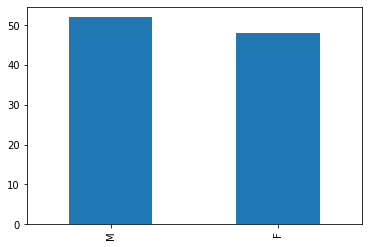

In [98]:
table2 = df['GT'].value_counts()
table2.plot.bar()

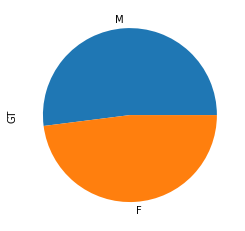

In [99]:
table2.plot.pie()

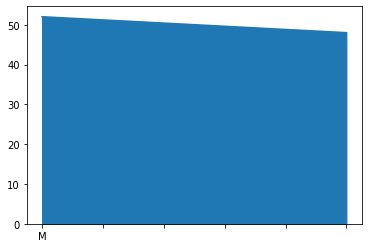

In [100]:
table2.plot.area()

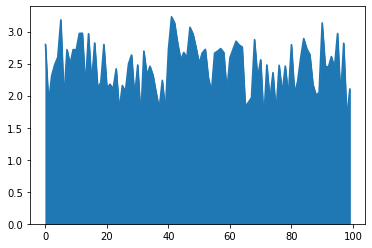

In [101]:
df['US_TBM1'].plot.area()

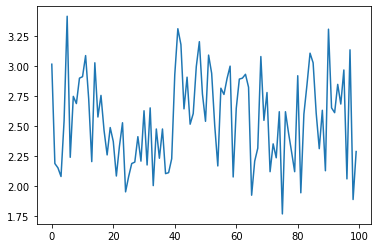

In [102]:
df['US_TBM2'].plot.line()

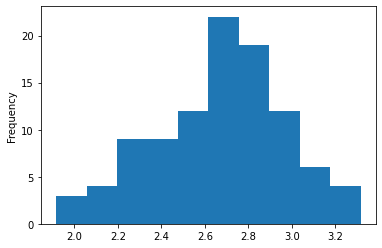

In [103]:
df['US_TBM3'].plot.hist()

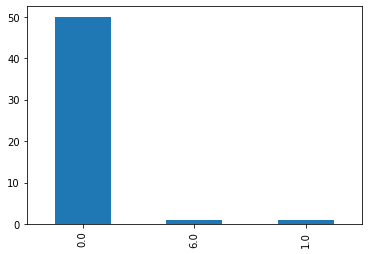

In [104]:
m = df[df['GT'].str.contains('M')]
m['DT'].value_counts().plot.bar()

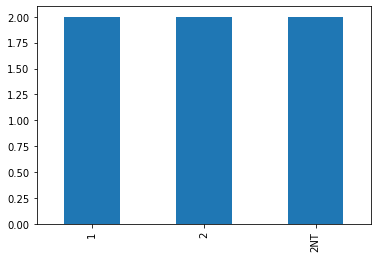

In [105]:
DK=df[(df['DH1'] >= 5) & (df['DH2'] >= 4) & (df['DH3']>=4)]
DK1=DK.loc[DK['DT'] == 0]
DK2=DK1[DK1['GT'].str.contains('M')]
DK2['KV'].value_counts().plot.bar()

In [119]:
DK3=df[(df['DH1'] >= 5) & (df['DH2'] >= 5) & (df['DH3']>=5) & (df['KV'] == '2NT')].groupby(['KV','DH1','DH2','DH3']).agg({'KV':'count'})
DK3

,,,,KV
KV,DH1,DH2,DH3,
2NT,6.75,5.25,5.0,1


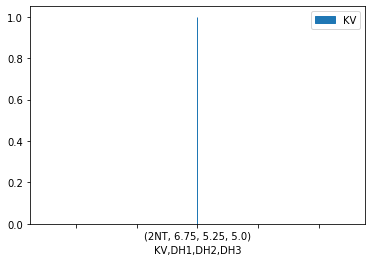

In [123]:
DK3.plot.area()